## Use Random Forest Tree

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error # because the competition uses RMSE 
from sklearn.model_selection import train_test_split

import pandas as pd


In [4]:
backpack_data = pd.read_csv('./train.csv')
backpack_data_extra = pd.read_csv('./training_extra.csv')
# Filter rows with missing values
backpack_data = backpack_data.dropna(axis=0) # Drop rows 
backpack_data.head()
backpack_data.Brand.describe()

backpack_data_full = pd.concat([backpack_data, backpack_data_extra])

<Figure size 1000x600 with 0 Axes>

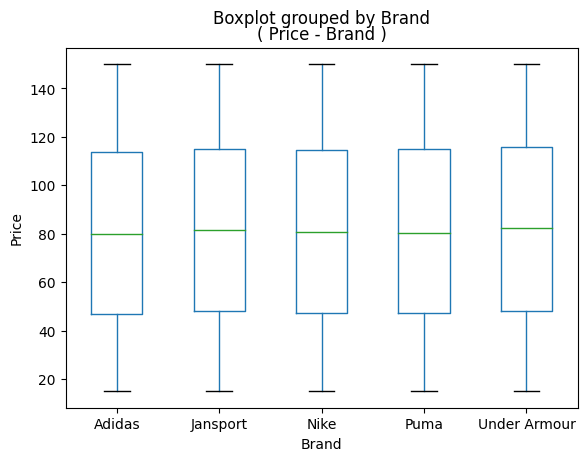

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
backpack_data_full.boxplot(column='Price', by='Brand', grid=False)
plt.title('( Price - Brand )')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

`ValueError: could not convert string to float: 'Puma'`  
Random Forest Tree cannot handle String, but only Number
---

Use ```pd.get_dummies()```

In [6]:
# Target : Price
y = backpack_data_full.Price
# Factors
backpack_features = ['Brand', 'Material', 'Size', 'Compartments', 'Weight Capacity (kg)', 'Color']
X = backpack_data_full[backpack_features]
X_to_numeric = pd.get_dummies(X)

# Split into test and train data
X_train, X_val, y_train, y_val = train_test_split(X_to_numeric, y, random_state=1)

In [ ]:
# Creating Random Forest Tree
# Takes appx. 41m
rft = RandomForestRegressor(random_state=1, n_estimators=100) 
# Takes appx. 3m 20s
# rft = RandomForestRegressor(random_state=1, n_estimators=1) # training rft (reduce complexity)
# Train
rft.fit(X_train, y_train)                                                                                                                            
preds = rft.predict(X_val)
rmse = root_mean_squared_error(y_val, preds)
print(rmse)

41.54574978968205


In [ ]:
# # Extra training
# backpack_data_extra = pd.read_csv('./training_extra.csv')
# y_e = backpack_data_extra.Price
# X_e = backpack_data_extra[backpack_features]                                         
# X_to_numeric_e = pd.get_dummies(X_e)

# X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(X_to_numeric_e, y_e, random_state=1)

# rft.fit(X_train_e, y_train_e)
# preds = rft.predict(X_val_e)
# rmse_e = root_mean_squared_error(y_val_e, preds)
# print(rmse_e)

In [10]:
# Apply to test.csv
backpack_data_test = pd.read_csv('./test.csv')
X_test = backpack_data_test[backpack_features]
X_test_numeric = pd.get_dummies(X_test)
X_test_numeric = X_test_numeric.reindex(columns=X_to_numeric.columns, fill_value=0) # Align the columns of test set to match training set
preds_test = rft.predict(X_test_numeric)
# print(preds_test)
# print(type(preds_test))

# id, Price
result = pd.DataFrame({
    'id': backpack_data_test.id,
    'Price': preds_test,
})
print(result)
result.to_csv('submission.csv', index=False)

            id       Price
0       300000   87.313935
1       300001   86.581284
2       300002  101.926869
3       300003  102.828889
4       300004   81.720422
...        ...         ...
199995  499995   52.926661
199996  499996   90.105741
199997  499997   59.602983
199998  499998   85.330609
199999  499999   80.402347

[200000 rows x 2 columns]
